In [1]:
from modules.data import data_loader, data_splitter, data_reader
from modules.models import arima, lag_llama
from modules.evaluation.evaluate import evaluate
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from itertools import islice

In [3]:
prediction_length = 1

In [4]:
data = data_loader.get_simle_data()
train, test = data_splitter.split_data(data, prediction_length)

[*********************100%%**********************]  1 of 1 completed


In [5]:
arima_model = arima.get_autoarima(train)

In [6]:
autoarima_predictions = arima.autoarima_predictions(arima_model, prediction_length)

In [7]:
lag_llama_predictions, tss = lag_llama.get_lam_llama_forecast(train, prediction_length)

In [8]:
lag_llama_predictions = list(lag_llama_predictions[0].samples.mean(axis = 0))

In [9]:
data["arima_forecast"] = [None] * len(train) + autoarima_predictions
data["lag_llama_forecast"] = [None] * len(train) + lag_llama_predictions

<AxesSubplot: >

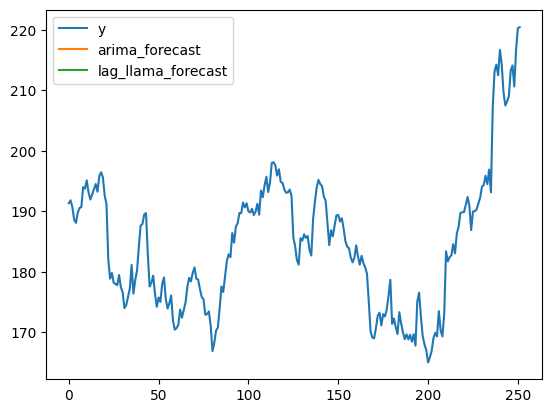

In [10]:
data.drop("ds", axis = 1).plot()

In [11]:
evaluate(list(test["y"]), autoarima_predictions = autoarima_predictions, lag_llama_predictions = lag_llama_predictions)

Evaluation for autoarima_predictions:
Mean Squared Error (MSE): 0.016218099254454964
Mean Absolute Error (MAE): 0.1273503013520383
R-squared (R^2): nan
Root Mean Squared Error (RMSE): 0.1273503013520383
------------------------------
Evaluation for lag_llama_predictions:
Mean Squared Error (MSE): 788.1943601262301
Mean Absolute Error (MAE): 28.074799378200908
R-squared (R^2): nan
Root Mean Squared Error (RMSE): 28.074799378200908
------------------------------


C:\Users\topco\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\topco\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [12]:
all_stocks = data_reader.read_data("stock")[0]

In [13]:
all_stocks.iloc[:, 203]

0      74.122696
1      73.163040
2      71.416496
3      72.635246
4      73.047897
         ...    
246    69.309998
247    68.830002
248    68.610001
249    68.639999
250    68.400002
Name: GILD, Length: 251, dtype: float64

# Methodology

 - frequency: daily
 - steps: 10
 - target: Close price

In [14]:
"""
first_col = True
i = 0
r2_arima = []
r2_llama = []
for column in list(all_stocks.columns):
    if first_col:
        first_col = False
        continue
    if i == 50:
        break
    data = all_stocks[["ds", column]]
    data.columns = ["ds", "y"]
    train, test = data_splitter.split_data(data, prediction_length)
    
    arima_model = arima.get_autoarima(train)
    autoarima_predictions = arima.autoarima_predictions(arima_model, prediction_length)
    lag_llama_predictions, tss = lag_llama.get_lam_llama_forecast(train, prediction_length)
    lag_llama_predictions = list(lag_llama_predictions[0].samples.mean(axis = 0))

    arima_r2 = r2_score(list(test["y"]), autoarima_predictions)
    llama_r2 = r2_score(list(test["y"]), lag_llama_predictions)

    r2_arima.append(arima_r2)
    r2_llama.append(llama_r2)
    print(column + f" done___{i}")
    print("--------------")
    i +=1
"""

    

'\nfirst_col = True\ni = 0\nr2_arima = []\nr2_llama = []\nfor column in list(all_stocks.columns):\n    if first_col:\n        first_col = False\n        continue\n    if i == 50:\n        break\n    data = all_stocks[["ds", column]]\n    data.columns = ["ds", "y"]\n    train, test = data_splitter.split_data(data, prediction_length)\n    \n    arima_model = arima.get_autoarima(train)\n    autoarima_predictions = arima.autoarima_predictions(arima_model, prediction_length)\n    lag_llama_predictions, tss = lag_llama.get_lam_llama_forecast(train, prediction_length)\n    lag_llama_predictions = list(lag_llama_predictions[0].samples.mean(axis = 0))\n\n    arima_r2 = r2_score(list(test["y"]), autoarima_predictions)\n    llama_r2 = r2_score(list(test["y"]), lag_llama_predictions)\n\n    r2_arima.append(arima_r2)\n    r2_llama.append(llama_r2)\n    print(column + f" done___{i}")\n    print("--------------")\n    i +=1\n'

In [15]:
#np.mean(r2_arima)

In [16]:
#np.mean(r2_llama)

In [17]:
all_returns = data_reader.read_data("return")[0]

In [18]:

first_col = True
i = 0
r2_arima = []
r2_llama = []
arima_correct = []
llama_correct = []
for column in list(all_returns.columns):
    if first_col:
        first_col = False
        continue
    # to make it shorter, running the experiment only on 50 stocks
    if i == 50:
        break
    data = all_returns[["ds", column]]
    data.columns = ["ds", "y"]
    train, test = data_splitter.split_data(data, prediction_length)
    
    arima_model = arima.get_autoarima(train)
    autoarima_predictions = arima.autoarima_predictions(arima_model, prediction_length)
    lag_llama_predictions, tss = lag_llama.get_lam_llama_forecast(train, prediction_length, context_length=64)
    lag_llama_predictions = list(lag_llama_predictions[0].samples.mean(axis = 0))

    #arima_r2 = r2_score(list(test["y"]), autoarima_predictions)
    #llama_r2 = r2_score(list(test["y"]), lag_llama_predictions)

    #r2_arima.append(arima_r2)
    #r2_llama.append(llama_r2)
    
    arima_correct.append(autoarima_predictions[0]*list(test["y"])[0] > 0)
    llama_correct.append(lag_llama_predictions[0]*list(test["y"])[0] > 0)
    print(column + f" done___{i}")
    print("--------------")
    i +=1


A done___0
--------------
AAL done___1
--------------
AAPL done___2
--------------
ABBV done___3
--------------
ABNB done___4
--------------
ABT done___5
--------------
ACGL done___6
--------------
ACN done___7
--------------
ADBE done___8
--------------
ADI done___9
--------------
ADM done___10
--------------
ADP done___11
--------------
ADSK done___12
--------------
AEE done___13
--------------
AEP done___14
--------------
AES done___15
--------------
AFL done___16
--------------
AIG done___17
--------------
AIZ done___18
--------------
AJG done___19
--------------
AKAM done___20
--------------
ALB done___21
--------------
ALGN done___22
--------------
ALL done___23
--------------
ALLE done___24
--------------
AMAT done___25
--------------
AMCR done___26
--------------
AMD done___27
--------------
AME done___28
--------------
AMGN done___29
--------------


C:\Users\topco\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
C:\Users\topco\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
C:\Users\topco\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
C:\Users\topco\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


AMP done___30
--------------
AMT done___31
--------------
AMZN done___32
--------------
ANET done___33
--------------
ANSS done___34
--------------
AON done___35
--------------
AOS done___36
--------------
APA done___37
--------------
APD done___38
--------------
APH done___39
--------------
APTV done___40
--------------
ARE done___41
--------------
ATO done___42
--------------
AVB done___43
--------------
AVGO done___44
--------------
AVY done___45
--------------
AWK done___46
--------------
AXON done___47
--------------
AXP done___48
--------------
AZO done___49
--------------


In [19]:
np.sum(arima_correct)

10

In [20]:
np.sum(llama_correct)

38

In [21]:
np.mean(r2_arima)

C:\Users\topco\AppData\Roaming\Python\Python311\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\topco\AppData\Roaming\Python\Python311\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


nan

In [22]:
np.median(r2_arima)

nan

In [23]:
np.mean(r2_llama)

nan

In [24]:
np.median(r2_llama)

nan